# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

Таблица Indian liver pations records.

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data[:3]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


Columns:

*  Age of the patient - возраст пациента
*  Gender of the patient - пол пациента
*  Total Bilirubin - общий билирубин
*  Direct Bilirubin - прямой билирубин
*  Alkaline Phosphotase - щелочная фосфотаза
*  Alamine Aminotransferase - Аламин Аминотрансфераз
*  Aspartate Aminotransferase - Аспартатаминотрансфераза
*  Total Protiens - всего белков
*  Albumin - альбумин
*  Albumin and Globulin Ratio - соотношение альбумина и глобулина
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease) - признак болезни печени

**Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.**

In [89]:
data[data.Total_Bilirubin == 75]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
166,55,Male,75.0,3.6,332,40,66,6.2,2.5,0.6,1


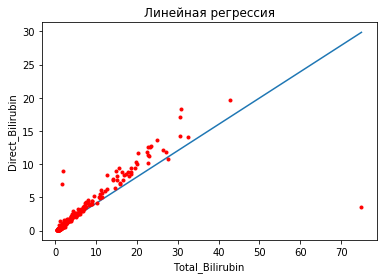

Предсказание модели для Total_Bilirubin 0.7:  [0.45807341]
Предсказание модели для Total_Bilirubin 10.9:  [4.49298903]
Предсказание модели для Total_Bilirubin 7.3:  [3.06890116]


In [3]:
model = LinearRegression()
result = model.fit(np.array(data.Total_Bilirubin).reshape(-1,1), data.Direct_Bilirubin)

# print('intercept:', model.intercept_)
# print('slope:', model.coef_)
plt.xlabel('Total_Bilirubin')
plt.ylabel('Direct_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(data.Total_Bilirubin), max(data.Total_Bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(data.Total_Bilirubin, data.Direct_Bilirubin, 'r.')
plt.show()

print('Предсказание модели для Total_Bilirubin 0.7: ', model.predict(np.array([0.7]).reshape(-1, 1)))
print('Предсказание модели для Total_Bilirubin 10.9: ', model.predict(np.array([10.9]).reshape(-1, 1)))
print('Предсказание модели для Total_Bilirubin 7.3: ', model.predict(np.array([7.3]).reshape(-1, 1)))

**Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.**

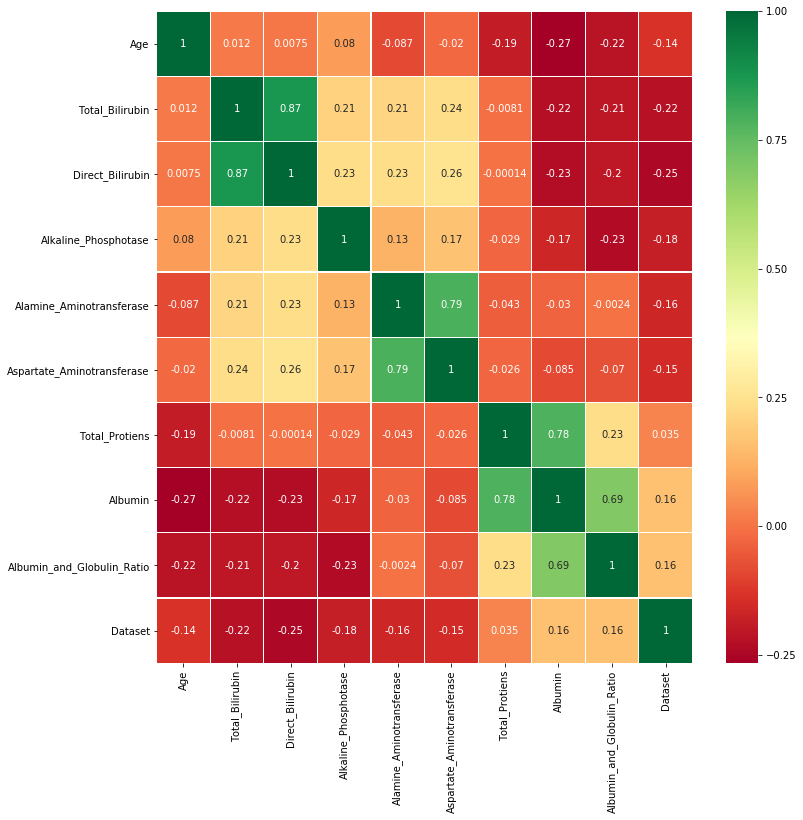

In [4]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [5]:
tp = data['Total_Protiens']
al = data['Albumin']
ds = data['Dataset']
x = np.vstack([np.array(tp), np.array(al)]).T
y = np.array(ds)
model = LinearRegression().fit(x, y)
#print('intercept:', model.intercept_)
#print('slope:', model.coef_)
print('Предсказание модели для Total_Protiens 6.8-3.3: ', model.predict(np.array([[6.8, 3.3]])))
print('Предсказание модели для Total_Protiens 7.5-3.2: ', model.predict(np.array([[7.5, 3.2]])))
print('Предсказание модели для Total_Protiens 7.0-3.3: ', model.predict(np.array([[7.0, 3.3]])))

Предсказание модели для Total_Protiens 6.8-3.3:  [1.28634674]
Предсказание модели для Total_Protiens 7.5-3.2:  [1.19724554]
Предсказание модели для Total_Protiens 7.0-3.3:  [1.26653921]


In [ ]:
# насколько понимаю, показывает степень близости к 1 или 2

**Посчитать квартили для всех колонок.**

In [6]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


**Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?**

In [23]:
#data.groupby(['Age']).count()

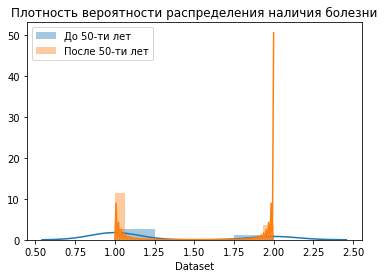

Среднее значение для людей младше 50-ти лет: 1.3172804532577904
Квартиль .5 для людей младше 50-ти лет: 0.5    1.0
Name: Dataset, dtype: float64
Среднее значение для людей старше 50-ти лет: 1.2391304347826086
Квартиль .5 для людей старше 50-ти лет: 0.5    1.0
Name: Dataset, dtype: float64


In [7]:
lt = data[data['Age']<50]['Dataset']
gt = data[data['Age']>=50]['Dataset']

sns.distplot(lt)
sns.distplot(gt)
plt.title('Плотность вероятности распределения наличия болезни')
plt.legend(['До 50-ти лет', 'После 50-ти лет'])
plt.show()

print(f'Среднее значение для людей младше 50-ти лет: {lt.mean()}')
print(f'Квартиль .5 для людей младше 50-ти лет: {lt.quantile([.5])}')
print(f'Среднее значение для людей старше 50-ти лет: {gt.mean()}')
print(f'Квартиль .5 для людей старше 50-ти лет: {gt.quantile([.5])}')

In [ ]:
# учитвыая что признак болезни является категориальными данными (да/нет), среднее всегда будет колебаться между ними,
# а второй квартиль будет равен либо одному признаку, либо другому.

**Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?**

In [10]:
tb = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(tb, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

In [12]:
# значение менее 5% => отвергаем нулевую гипотезу об отсутствии 
# статистического различия между генеральной совокупностью и выборкой c больными людьми

**Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?**

In [13]:
sick = data[data['Dataset']==1]['Total_Bilirubin']
healthy = data[data['Dataset']==2]['Total_Bilirubin']
stats.ttest_ind(sick, healthy)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

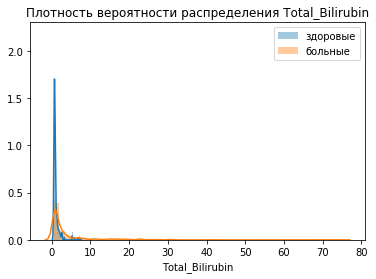

In [17]:
# значение гораздо больше 5% => не имеется статистического различия между двумя выборками
sns.distplot(healthy)
sns.distplot(sick)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['здоровые', 'больные'])
plt.show()

**Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).**

In [22]:
max(data.Age)

90

In [26]:
group1 = data[data.Age.isin(range(0, 30))]['Dataset']
group2 = data[data.Age.isin(range(30, 55))]['Dataset']
group3 = data[data.Age.isin(range(55, 91))]['Dataset']
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=9.375048806025259, pvalue=9.837730889092287e-05)

In [27]:
# значение pvalue практически равно нулю, следовательно группы между собой различаются

Вопросы задавать на почту yustiks@gmail.com